https://oj.rnd.huawei.com/problems/2493/details

题目描述
某次招聘活动中，共有 deptNum 个部门在招人，每个部门都设定了自己的：招聘目标人数、机考和技面的最低分要求。共有 candidateNum 个应聘者，每个应聘者都有两项能力值：机考分数和技面分数。

招聘规则如下：

- 选人规则：首先达到部门的门槛要求，即机考和技面分数均**大于等于**对应最低分要求；然后选人：优先录取技面分数**较高**的；若技面分数相同，则录取机考分数**较高**的；若机考分数也相同，则录取应聘者编号**较小**的。
- 先进行常规录取，此阶段采用轮询录取方式，以完成招聘目标：
    - 每一轮按部门编号从小到大轮询，部门遵照选人规则录取一人，若无符合要求者则放弃；若已招满（或已无人可录），不再选人；
    - 不断轮询，直至所有部门都完成招聘目标（但不能超过）、或未招满但已无人可录。
- 在常规录取阶段结束后，各部门均尝试进行**一次补录**，但最多补录一人（即可能比招聘目标多一人）：
    - 按部门编号从小到大的顺序进行补录；
    - 如果还有应聘者与该部门常规录取的**最后**一名应聘者能力相同（即机考和技面分数均相同），则部门参照选人规则**补录一人**即结束招聘（即使未成功补录，也结束招聘）。
现给出部门的招聘需求deptDemands，以及应聘者的信息 candidateAbilities。请按部门编号从小到大依次输出所录取人员，部门内所录取人员按录取顺序输出（若无录取人员，输出空序列 []）。

解答要求
时间限制：1000ms, 内存限制：256MB
输入
第一行的整数表示招聘部门个数 deptNum，1 <= deptNum <= 10
随后 deptNum 行依次表示每个部门的要求，记录于 deptDemands 数组中，deptDemands[i] 表示编号为 i 的部门的目标人数 机考最低分 技面最低分，目标人数范围 [1, 200]，最低分范围 [100, 150]

接下来一行的整数表示应聘者数量 candidateNum，1 <= candidateNum <= 10000
随后 candidateNum 行依次表示每个应聘者的信息，记录于数组 candidateAbilities 中，candidateAbilities[j] 表示编号为 j 的应聘者的机考分数 技面分数，机考和技面分数取值范围 [100, 200]

输出
按部门编号从小到大，每行输出一个部门所录取人员的编号；若没有录取人员，输出空序列 [] 。

样例
输入样例 1 复制
```
2
2 130 120
1 150 150
6
150 100
160 190
150 200
200 190
160 190
160 190
输出样例 1

[2 1 4]
[3]
```
提示样例 1
招聘录取过程解释如下：
- 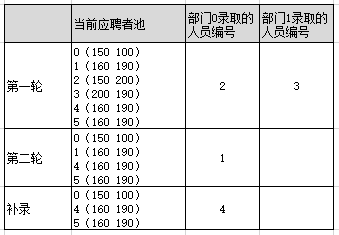

第一轮：按部门编号从小到大，部门0 先选人，按选人规则优先录取了应聘者2 。然后部门1选人，优先录取了应聘者 3 ，部门1招满、退出轮询。
第二轮：部门0 选人，应聘者1、4、5 的能力值都相同，录取编号小的应聘者1 。
两轮后部门0 和 部门1 都达到人数目标，完成常规录取。

补录：部门0 先选人，应聘者 4 和 5 与此前最后录取的应聘者1 的能力值相同，按规则补录一人（应聘者4）后结束招聘。 然后部门1 补录，没有人与此前最后录取的应聘者3 具备相同的能力值。
招聘结束后：部门0依次录取人员为 2 1 4，部门1依次录取人员为 3 （应聘者0 和 应聘者5 未被任何部门录取）



输入样例 2 复制
```
2
2 100 150
1 150 100
2
100 120
150 100
输出样例 2

[]
[1]
```
提示样例 2
两个应聘者都不满足部门0的门槛要求，因此部门0未录取人员。
应聘者1满足部门1的门槛要求，因此部门1录取了应聘者1 。


```
输入样例 3 复制

3
1 100 100
1 100 120
1 100 150
5
100 200
100 200
100 200
100 200
100 200
输出样例 3

[0 3]
[1 4]
[2]
```
提示样例 3
常规录取阶段，三个部门分别录取应聘者0、1、2；
补录阶段，部门0先选人，补录了应聘者3； 剩下应聘者4，满足部门1和部门2的补录条件，但部门1先选人。

In [165]:
from typing import List


class DeptDemand:
    def __init__(self, dept_id, employ_num, progm_thd, tech_thd):
        self.dept_id = dept_id
        self.employ_num = employ_num
        self.progm_thd = progm_thd
        self.tech_thd = tech_thd
        # 记录录取人员
        self.employ_list = []


class Candidate:
    def __init__(self, candidate_id, progm_score, tech_score):
        self.candidate_id = candidate_id
        self.progm_score = progm_score  # 机考分数
        self.tech_score = tech_score  # 面试分数


class Solution:
    def __init__(self):
        self.finish = True
        self.temp = -1

    def recruitment_result(self, dept_demands: List[DeptDemand],
                           candidate_abilities: List[Candidate]) -> List[List[int]]:
        candidate_abilities.sort(key=lambda x: (x.tech_score, x.progm_score, -x.candidate_id), reverse=True)
        # 招聘从池不再变化结束
        while len(candidate_abilities) != self.temp:
            self.temp = len(candidate_abilities)
            for dept_demand in dept_demands:
                if len(dept_demand.employ_list) < dept_demand.employ_num:  # 部门没招满
                    for num, candidate in enumerate(candidate_abilities):
                        if candidate.progm_score >= dept_demand.progm_thd and candidate.tech_score >= dept_demand.tech_thd:
                            dept_demand.employ_list.append(candidate_abilities.pop(num))
                            break

        # 补录环节
        for dept_demand in dept_demands:
            for num, candidate in enumerate(candidate_abilities):
                if dept_demand.employ_list:
                    last = dept_demand.employ_list[-1]
                    if candidate.progm_score == last.progm_score and candidate.tech_score == last.tech_score:
                        dept_demand.employ_list.append(candidate_abilities.pop(num))
                        break
                else:
                    continue
        return [[y.candidate_id for y in x.employ_list] for x in dept_demands]


In [166]:
dept_demand1 = DeptDemand(0, 2, 130, 120)
dept_demand2 = DeptDemand(1, 1, 150, 150)
candidate1 = Candidate(0, 150, 100)
candidate2 = Candidate(1, 160, 190)
candidate3 = Candidate(2, 150, 200)
candidate4 = Candidate(3, 200, 190)
candidate5 = Candidate(4, 160, 190)
candidate6 = Candidate(5, 160, 190)
dept_demands = [dept_demand1, dept_demand2]
candidate_abilities = [candidate1, candidate2, candidate3, candidate4, candidate5, candidate6]

In [167]:
# dept_demand1 = DeptDemand(0, 1, 110, 110)
# dept_demand2 = DeptDemand(1, 1, 136, 113)
# candidate1 = Candidate(0, 100, 200)
# candidate2 = Candidate(1, 100, 100)
# candidate3 = Candidate(2, 100, 200)
# candidate4 = Candidate(3, 100, 200)
# candidate5 = Candidate(4, 100, 200)
# dept_demands = [dept_demand1, dept_demand2]
# candidate_abilities = [candidate1, candidate2, candidate3, candidate4, candidate5]

In [168]:
sol = Solution()
sol.recruitment_result(dept_demands, candidate_abilities)

[[2, 1, 4], [3]]